<a href="https://colab.research.google.com/github/tensorflow-project/FineTuning/blob/main/deteleMe/image_generation_two_concepts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/tensorflow-project/FineTuning

Cloning into 'FineTuning'...
remote: Enumerating objects: 885, done.
remote: Counting objects: 100% (153/153), done.
remote: Compressing objects: 100% (114/114), done.
remote: Total 885 (delta 125), reused 39 (delta 39), pack-reused 732
Receiving objects: 100% (885/885), 133.40 MiB | 15.83 MiB/s, done.
Resolving deltas: 100% (634/634), done.


In [2]:
import sys
import os
import numpy as np
from google.colab import drive
import urllib.request

py_file_location = "/content/FineTuning/two_concepts"
sys.path.append(os.path.abspath(py_file_location))
py_file_location = "/content/FineTuning/models"
sys.path.append(os.path.abspath(py_file_location))

import textual_inversion_two_concepts as txt

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE
13911/13911 [==============================] - 0s 1us/step


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


136824240/136824240 [==============================] - 2s 0us/step


In [3]:
### load stable diffusion class and placeholder tokens from textual_inversion.py
stable_diffusion = txt.stable_diffusion
placeholder_token_broccoli = txt.placeholder_token_broccoli
placeholder_token_emoji = txt.placeholder_token_emoji
placeholder_token_combined = txt.placeholder_token_combined

In [21]:
import requests

file_id = '1A0G0mCEAPxSiO0j0xweRUzn6-mKfZ8iv'
url = 'https://drive.google.com/uc?id=' + file_id
response = requests.get(url)

### random name
filename = '35epochs_weights_with_two_concepts.npy'

with open(filename, 'wb') as f:
    f.write(response.content)

weights = np.load(filename, allow_pickle=True)

### Set the weights of the text encoder
stable_diffusion.text_encoder.set_weights(weights)

UnpicklingError: ignored

In [23]:
### choose where to load the weights from, either you insert your own file_id you load our pretrained weights
### make sure to insert the exact name of your weight.npy
"""drive.mount("/content/drive")
path = '/content/drive/MyDrive/weights_with_two_concepts(1).npy'"""

### generate a share link via Goole Drive: everthing between file/d/ ......... /view  is file_id
### by keeping this file_id, you generate images with 35 epoch of training on two concepts
#https://drive.google.com/file/d/1-93INsFBfnA0K1Ou_TVr_YC_nmBYOxtH/view?usp=sharing
file_id = '1-93INsFBfnA0K1Ou_TVr_YC_nmBYOxtH'
url = f"https://drive.google.com/uc?id={file_id}"

### random name
filename = '35epochs_weights_with_two_concepts.npy'

### Download the file from the URL and save it locally
urllib.request.urlretrieve(url, filename=filename)

### Load the saved numpy file using numpy.load()
weights = np.load(filename, allow_pickle=True)

### Set the weights of the text encoder
#stable_diffusion.text_encoder.set_weights(weights)

UnpicklingError: ignored

In [25]:
import urllib.request
import zipfile
import numpy as np

# Download the zipped file from the URL and save it locally
#https://drive.google.com/file/d/1uWXS33QSc87GCg-D0R_w-slqfAKSJY_B/view?usp=sharing

file_id = '1uWXS33QSc87GCg-D0R_w-slqfAKSJY_B'
url = f"https://drive.google.com/uc?id={file_id}"
zip_file_name = 'ezyzip.zip'
urllib.request.urlretrieve(url, filename=zip_file_name)

# Extract the zipped file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall()

# Load the saved numpy file using numpy.load()
filename = '35epochs_weights_with_two_concepts.npy'
weights = np.load(filename, allow_pickle=True)

# Set the weights of the text encoder
stable_diffusion.text_encoder.set_weights(weights)

BadZipFile: ignored

In [18]:
import pickle

with open(filename, "rb") as f:
    try:
        data = pickle.load(f)
    except (pickle.UnpicklingError, TypeError, EOFError) as e:
        print("Failed to unpickle file:", e)

Failed to unpickle file: invalid load key, '<'.


In [ ]:
###load the array of the weights of the text encoder from the training
text_encoder_weights = np.load(weights, allow_pickle=True)

### Set the weights of the text encoder
stable_diffusion.text_encoder.set_weights(text_encoder_weights)

In [ ]:
### choose how much of an emoji your broccoli sticker should include
txt.percentage_emoji(0.3)

### insert your prompt here for just combining the tokens per prompt
prompt_combination = f" a {placeholder_token_broccoli} with {placeholder_token_emoji}"
### prompt for the two concepts "broccoli" and "emoji" combined by interpolation
prompt_interpolation = f"A happy {placeholder_token_combined}. "

###how many images are to be generated
number = 3

25/25 [==============================] - 82s 3s/step


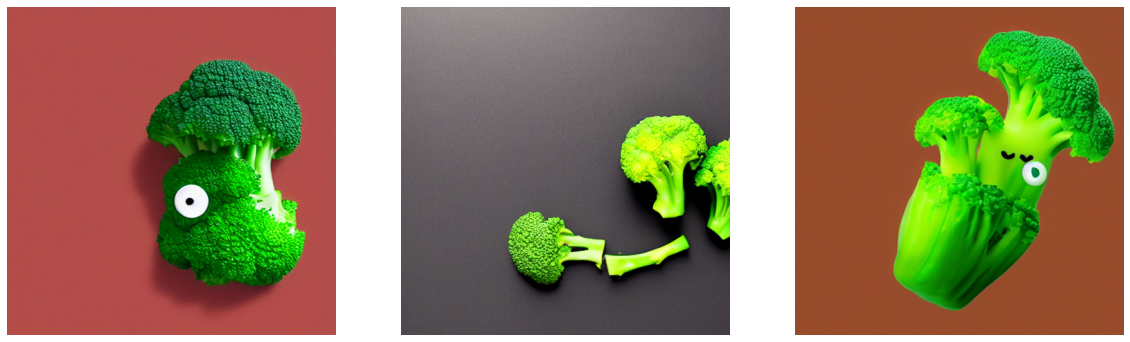

In [ ]:
### generate some examples and plot them according to our new concept and prompts
### with the combined tokens
generated = stable_diffusion.text_to_image(
    prompt_combination, batch_size=number, num_steps = 25, seed = 2234
)
txt.plot_images(generated)

25/25 [==============================] - 63s 3s/step


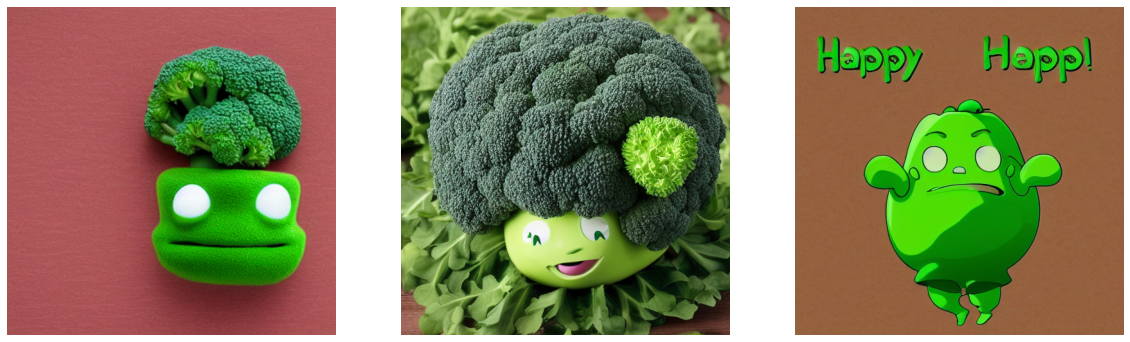

In [ ]:
### generate some examples and plot them according to our new concept and prompts
### with token interpolation
generated = stable_diffusion.text_to_image(
    prompt_interpolation,batch_size=3, num_steps = 25, seed = 2234
)
txt.plot_images(generated)

In [ ]:
### generate images and save them directly in your Google Drive
### where to store your images, you may have to create the folder "Images" first
drive_folder = '/content/drive/MyDrive/Images/'

###choose whether you want to use the interpolation prompt or the combined prompt
txt.image_generation(prompt_interpolation, drive_folder, number)

25/25 [==============================] - 28s 1s/step
